#                  Restaurant Data Processing

###                                            Xuebo Lai

This Jupyter Notebook Python file is created to process the restaurants data from yelp for later modeling purpose

Import all the necessary libraries for data processing

In [21]:
import numpy as np
import pandas as pd
import pylab as plt
from pylab import rcParams
from IPython.display import Image
from IPython.core.display import HTML
from pandas import *
import seaborn as sb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
rcParams["figure.figsize"] = 5,4
sb.set_style("whitegrid")

#### Step #1
Load the raw Restaurants Data obtained from yelp into DataFrame format in pandas 

In [2]:
restaurants = pd.read_csv("res.csv", index_col = "id")
restaurants.head()

,name,zip_code,city,state_code,address,phone,categories,is_close,price,rating,...,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19
id,,,,,,,,,,,,,,,,,,,,,
avena-new-york,Avena,10022.0,New York,NY,141 E 57th St_New York_ NY 10022_,(212) 752-5323,Italian,False,$$$,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
the-shadmoor-new-york,The Shadmoor,10022.0,New York,NY,1066 2nd Ave_New York_ NY 10022_,(212) 385-9195,seafood;,False,$$,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shaking-crab-new-york-4,Shaking Crab,10025.0,New York,NY,2869 Broadway_New York_ NY 10025_,(646) 861-2152,cajun;,False,$$,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
butcher-bar-new-york-2,Butcher Bar,10002.0,New York,NY,146 Orchard St_New York_ NY 10002_,(212) 842-8000,bbq;steak;burgers;,False,$$,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clinton-hall-new-york,Clinton Hall,10006.0,New York,NY,90 Washington St_New York_ NY 10006_,(212) 363-6000,bars;beergardens;,False,$$,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step #2
(1) Drop the columns that have absolutely no meaning
(2) Drop the columns that will not contribute to modeling and copy the data under a new variable 

In [3]:
restaurants_origin = restaurants.drop(["is_close"], axis=1)
restaurants_origin.head()

,name,zip_code,city,state_code,address,phone,categories,price,rating,review_number,...,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19
id,,,,,,,,,,,,,,,,,,,,,
avena-new-york,Avena,10022.0,New York,NY,141 E 57th St_New York_ NY 10022_,(212) 752-5323,Italian,$$$,5.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
the-shadmoor-new-york,The Shadmoor,10022.0,New York,NY,1066 2nd Ave_New York_ NY 10022_,(212) 385-9195,seafood;,$$,4.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shaking-crab-new-york-4,Shaking Crab,10025.0,New York,NY,2869 Broadway_New York_ NY 10025_,(646) 861-2152,cajun;,$$,4.5,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
butcher-bar-new-york-2,Butcher Bar,10002.0,New York,NY,146 Orchard St_New York_ NY 10002_,(212) 842-8000,bbq;steak;burgers;,$$,4.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clinton-hall-new-york,Clinton Hall,10006.0,New York,NY,90 Washington St_New York_ NY 10006_,(212) 363-6000,bars;beergardens;,$$,4.0,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# res_model is designed 
# delete city, state, address because they can represented by zip_code
res_model = restaurants.drop(["name","city","state_code","address","phone","is_close"], axis=1)
res_model.head()

,zip_code,categories,price,rating,review_number,cat1,cat2,cat3,cat4,cat5,...,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19
id,,,,,,,,,,,,,,,,,,,,,
avena-new-york,10022.0,Italian,$$$,5.0,34.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
the-shadmoor-new-york,10022.0,seafood;,$$,4.0,32.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shaking-crab-new-york-4,10025.0,cajun;,$$,4.5,49.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
butcher-bar-new-york-2,10002.0,bbq;steak;burgers;,$$,4.0,59.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clinton-hall-new-york,10006.0,bars;beergardens;,$$,4.0,301.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step #3
Remove missing value and duplicate data

In [5]:
res_model.dropna(how="all")
res_model.drop_duplicates()
res_model = res_model.fillna(0)
res_model.head()

,zip_code,categories,price,rating,review_number,cat1,cat2,cat3,cat4,cat5,...,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19
id,,,,,,,,,,,,,,,,,,,,,
avena-new-york,10022.0,Italian,$$$,5.0,34.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the-shadmoor-new-york,10022.0,seafood;,$$,4.0,32.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shaking-crab-new-york-4,10025.0,cajun;,$$,4.5,49.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
butcher-bar-new-york-2,10002.0,bbq;steak;burgers;,$$,4.0,59.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clinton-hall-new-york,10006.0,bars;beergardens;,$$,4.0,301.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Step #4
Quantify all columns except indexing column, id.
Perform Data Scaling

In [6]:
# category quantification
# mapping of categories:
# normalize all the value to 0-10
cat_index = {
    "American_new":2,
    "chinese":1,
    "seafood":3,
    "brunch":4,
    "bars":5,
    "french":6,
    "healthy":7,
    "mediterranean":8,
    "asianfusion":9,
    "korean":10,
    "mexican":11,
    "thai":12,
    "indian":13,
    "pizza":14,
    "latin":15,
    "ramen":16,
    "cuban":17,
    "japanese":18,
    "spanish":19
}
(rol,col) = res_model.shape
MAX = res_model.max(axis=0)
MIN = res_model.min(axis=0)
for i in range(rol):
    #print("counting: "+str(i))
    try:
        catList = res_model.ix[i,"categories"].split(";")
        catList = catList[:-1]
    except:
        continue
    for item in catList:
        try:
            num = cat_index[item]
            num = "cat"+str(num)
            res_model.ix[i,num] = (1.0/len(catList))
        except:
            continue
    res_model.ix[i,"zip_code"]=((float(res_model.ix[i,"zip_code"]-10000.0)/float(MAX[0]-10000.0)))*float(10)
    res_model.ix[i,"price"]=len(str(res_model.ix[i,"price"]))/10*2
    res_model.ix[i,"rating"]=(res_model.ix[i,"rating"])/10*2
    res_model.ix[i,"rating"]=(res_model.ix[i,"rating"])/10*2
    res_model.ix[i,"review_number"] = ((res_model.ix[i,"review_number"]))/100
    #print(res_model.ix[i,"price"])


res_model.ix[i,"review_number"]=(res_model.ix[i,"review_number"]-MIN[4])/(MAX[4]-MIN[4])

#print(MAX)
#print(MIN)
res_model=res_model.drop(["categories"], axis=1)
res_model.head()
#print(MAX)
#print(MIN)
    #print(res_model.ix[i])
    #res_model.ix[i,"categories"].split(";")


#x
#res_model.ix[3,1] = "haha"
#a = Series(np.array([1,2,3]))

#a

#res_model.ix[3].append(Series(np.array([1,2,3])))
#res_model.ix[3]


/Users/xuebolai/anaconda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/xuebolai/anaconda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars


,zip_code,price,rating,review_number,cat1,cat2,cat3,cat4,cat5,cat6,...,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19
id,,,,,,,,,,,,,,,,,,,,,
avena-new-york,0.162482,0.6,0.20,0.34,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the-shadmoor-new-york,0.162482,0.4,0.16,0.32,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shaking-crab-new-york-4,0.184638,0.4,0.18,0.49,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
butcher-bar-new-york-2,0.014771,0.4,0.16,0.59,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clinton-hall-new-york,0.044313,0.4,0.16,3.01,0.0,0.0,0.0,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Step #5
Perform PCA to the dataset to obtain better

In [9]:
res_model = res_model.replace([np.inf, -np.inf], np.nan).dropna()
pca = PCA()
pca.fit_transform(res_model)
print(pca.explained_variance_ratio_)

[  7.48935313e-01   2.45463924e-01   1.56951400e-03   8.43463038e-04
   6.84003136e-04   5.89104442e-04   3.58581959e-04   3.31344289e-04
   2.46070982e-04   2.34902563e-04   2.02070318e-04   1.46863902e-04
   1.16636960e-04   7.92824197e-05   7.34621830e-05   5.06642775e-05
   3.86535609e-05   3.61448934e-05   9.02355835e-36   8.37779551e-37
   1.89070772e-37   7.09177906e-38   0.00000000e+00]


#### Step #6
Visualizationa and interpretation of pca

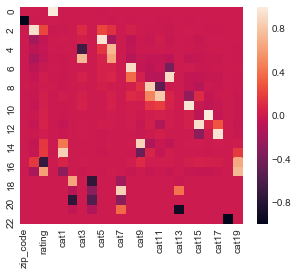

In [22]:
comps = pd.DataFrame(pca.components_,columns = res_model.columns.values)
sb.heatmap(comps)